## ASTR 2100, Winter 2020

## Homework Assignment 2 

## Yingyi Liang

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from codes.plot_utils import plot_pretty
from codes.plot_utils import plot_line_points
plot_pretty(fontsize=12)

## Exercise 1: Using splines for interpolation and estimates of  derivatives and integrals

### Data used in this exercise

For this exercise we will use a function $P(k)$ that is tabulated in a data file. 

In [2]:
# read in function that will be used for this exercise
k, Pk = np.loadtxt('data/test_matterpower_logintk1000.dat', usecols=(0, 1),  unpack=True)
# their log10 values that will be used 
lk, lPk = np.log10(k), np.log10(Pk)

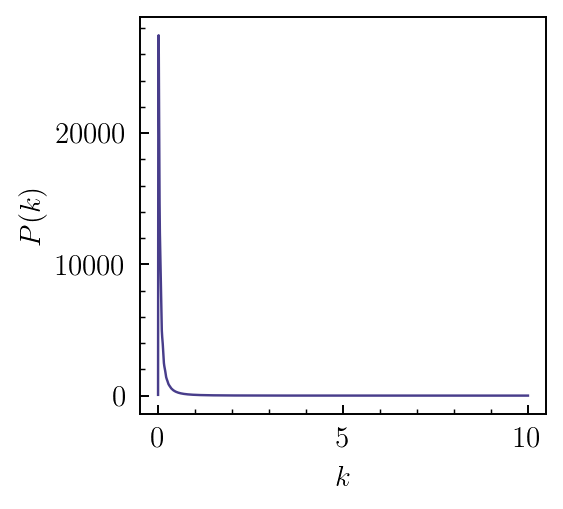

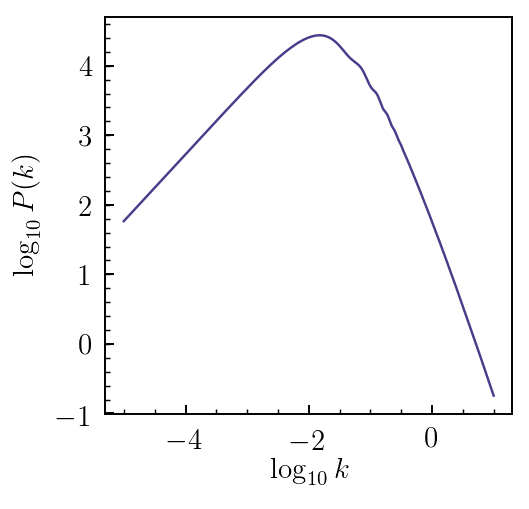

In [4]:
plot_line_points(k, Pk, xlabel=r'$k$', ylabel=r'$P(k)$', figsize=3)
plot_line_points(lk, lPk, xlabel=r'$\log_{10} k$', ylabel=r'$\log_{10} P(k)$', figsize=3)

The plots above show that $P(k)$ is changing very rapidly for small values of $k$ and slowly for large values. Functions that change rapidly are more difficult to approximate accurately because more training points are needed in the areas of rapid change. So it is often useful to examine how $\log_{10}$ of the function behaves as a function of $\log_{10}$ of the parameter (i.e., examine function in logarithmic space). This is what is done in the second plot above. We can see that in this case, $\log_{10} P(k)$ changes relatively slowly and so approximating $\log_{10} P(k)$ as a function of $\log_{10} k$ is preferrable. 

Overall, $\log_{10} P(k)$ looks like two power law functions of different exponent smoothly joined in the middle, but notice little "wiggles" around $\log_{10} k\sim -1$. These are real features of this function and make it not entirely trivial to approximate with, say, a polynomial of low order. 

Next, let's see how <tt>k</tt> and <tt>lk</tt> are spaced. 

In [5]:
# np.diff computes difference of 2 subsequent elements of lk
dlk = np.diff(lk) 
# if we look at the first 10 elements, it may seem that l (and lk) are evenly spaced
print(dlk[:10])
# however, this is not the case
print(dlk.min(), dlk.max())
# spacing of data points is not uniform overall

[0.04304196 0.04303239 0.04305963 0.04303769 0.04302909 0.04304367
 0.04303872 0.04302599 0.04304582 0.04303598]
0.0003967464299742818 0.04306143598772039



**Task 1a. (10 points)** Based on the code in the 03 notebook reproduced above, write a function that constructs interpolating (using <tt>np.linalg.solve</tt>) or approximating (using <tt>np.linalg.lstsq</tt>) polynomial for input vector of test points and corresponding tabulated function values with the following interface:

Test this function using $\sin(x)$ as a  test function as shown below and demonstrate that your routine works (i.e., produces sensible results). Try changing the number of training points used <tt>ntr</tt> from 20 to smaller values. Identify and report the smallest <tt>ntr</tt> for which you get *interpolating* polynomial that still looks qualitatively as a sine (for example, it has a clear minimum and maximum in the $[0,2\pi]$ interval). Try to come with your interpretation of the meaning of the minimum value that you find and briefly describe it. 

In [5]:
def poly_approx(xtr, ftr, xt, method = 'interpolation', poly_order = 1):
    """
    function constructing an approximating polynomial for the input 
    vector of training values of the approximated function ftr, 
    tabulated at the vector of training points xtr and compute the values
    of constructed polynomial at the input vector of test values xt
    
    Parameters:
    -----------
    xtr, ftr: array like
            vectors of training points and tabulated function values
    xt: array like
            vector of test points
    method: string
            defining the method to be used in construction of the polynomial
            'interpolation' - construct interpolating polynomial using np.linalg.solve
            'regression' - construct approximating polynomial np.linalg.lstsq
    poly_order: integer
            order of the approximating polynomial. This parameter is ignored
            for method='interpolation', but is used for 'regression'
            must be 0<=poly_order<=np.size(xtr)
    Returns:
    --------
    ft: array like
        values of the polynomial at xt 
    a:  array like
        polynomial coefficients
    """
    if method == 'interpolation':
        V = np.vander(xtr, N =  np.size(xtr), increasing = True) #Vandermonde matrix
        a = np.linalg.solve(V, ftr) #solve for polynomial coefficients vector a, as a = V^{-1}f
        pfit = np.poly1d(a[::-1]) 
        ft = pfit(xt)
        return ft, a
    if method == 'regression':
        a = np.polyfit(xtr, ftr, poly_order)
        pfit = np.poly1d(a)
        ft = pfit(xt)
        return ft, a

In [6]:
# test your routine using code below
xmin, xmax, ntr = 0., 2.*np.pi, 20
xtr = np.linspace(xmin, xmax, ntr)
ftr_int = np.sin(xtr)
# this vector is sine function + a little bit of Gaussian random noise (so mimics approximating noisy data)
ftr_fit = np.sin(xtr) + np.random.normal(scale=0.05, size=np.size(xtr))

nt = 1000 # should be different from nt
xt = np.linspace(xmin, xmax, nt)

poly_int, a_int = poly_approx(xtr, ftr_int, xt, method = 'interpolation')

poly_order=17
poly_fit, a_fit = poly_approx(xtr, ftr_fit, xt, method = 'regression', poly_order = poly_order)

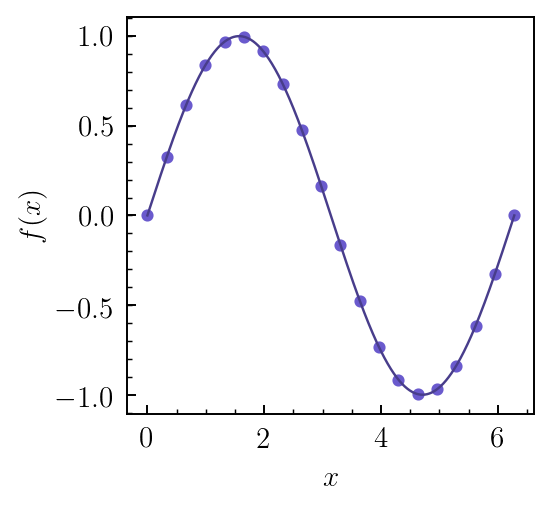

In [7]:
# plot results
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points = True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

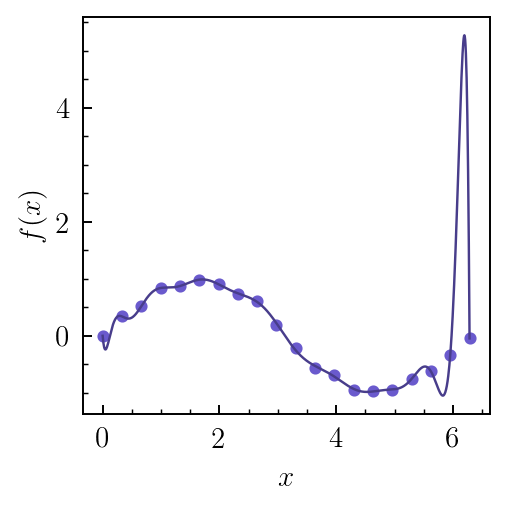

In [10]:
plot_line_points(xt, poly_fit, xp = xtr, yp = ftr_fit, points = True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize = 3)

**Task 1b. (5 points)** Now apply the routine you implemented to interpolate $P(k)$ read in below. If you don't manage to get the working implementation in 1a, you can use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html"><tt>np.polyfit</tt></a> routine for this exercise. 

In [20]:
nkt = 100 #1000
kt = np.linspace(k.min(), k.max(), nkt)

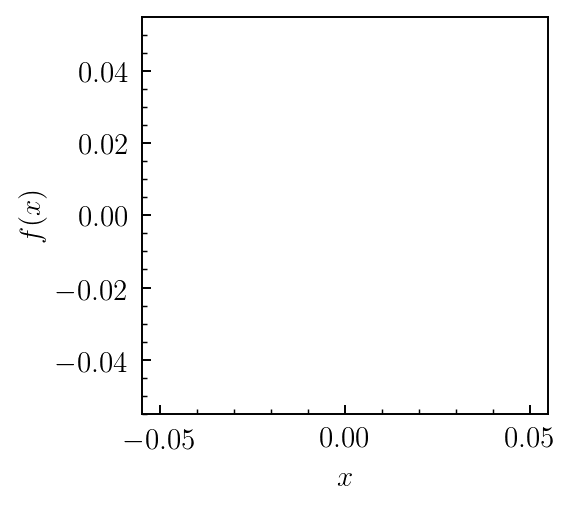

In [52]:
 poly_int, a_int = poly_approx(lk, lPk, kt, method = 'interpolation')
plot_line_points(kt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

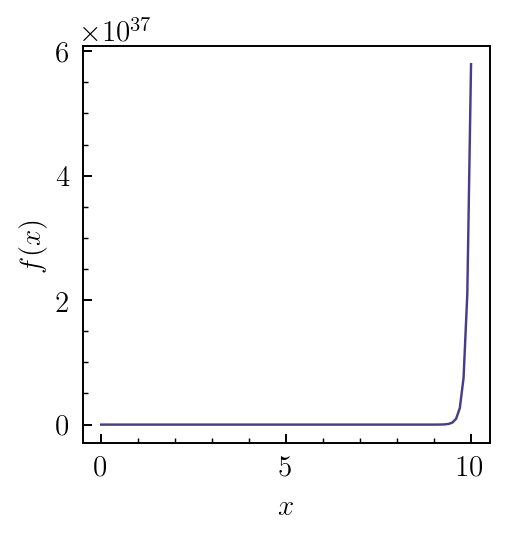

In [51]:
poly_int, a_int = poly_approx(lk, lPk, kt, method = 'regression', poly_order = np.size(kt))
plot_line_points(kt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

What happens? 
- The function does not resemble the original one at all.  

Try doing this for $\log_{10} k$ and $\log_{10} P(k)$ instead of $P(k)$. Then try with regression. 

In [53]:
lkt = np.linspace(lk.min(), lk.max(), nkt)

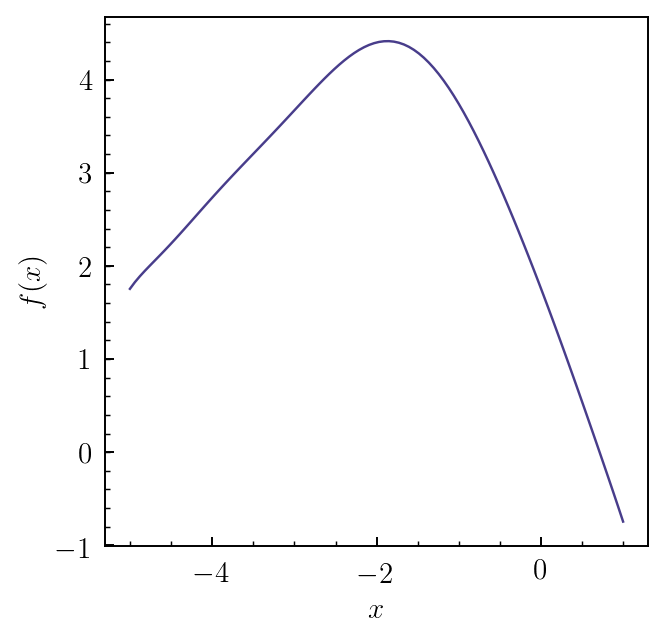

In [60]:
poly_int, a_int = poly_approx(lk, lPk, lkt, method = 'regression', poly_order = 10)
plot_line_points(lkt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize = 4)

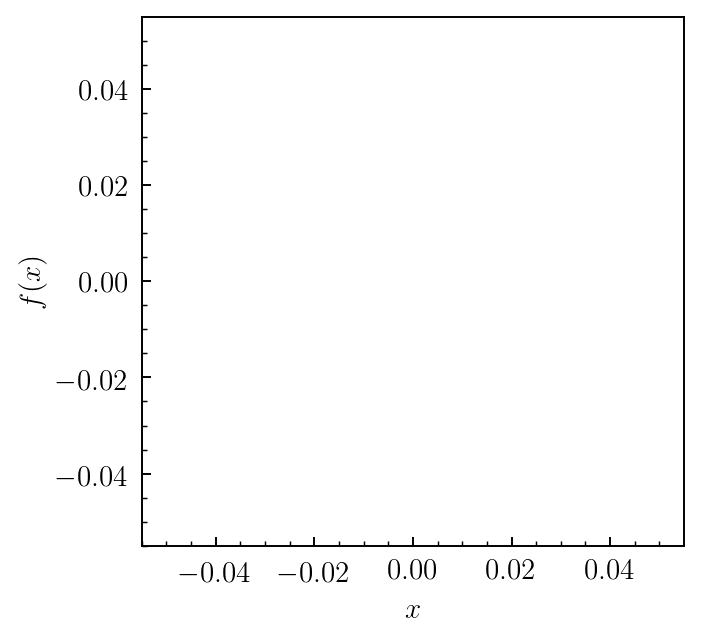

In [62]:
poly_int, a_int = poly_approx(lk, lPk, lkt, method = 'interpolation')
plot_line_points(lkt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize = 4)

In [64]:
poly_int

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

Do you get a sensible result? Think about what the routine is doing and try to come up with an explanation for the outcome of this exercise. (7 points)
- For the first method of interpolation with original data, the graphs does not match probably because the original data changes too rapidly at some places to be acurately approximated by 100 points. For the second method of using lk  and lPk, no matrix was even generated for interpolation.

Try regression with smaller poly_order values and find polynomial order for which at least somewhat sensible approximation can be obtained. What is that order? Think about a possible explanation for why this works for small order (3 points). 
- Poly order 10 works well with the data, maybe because the transformed data has a smooth and normal behavior.

### SciPy routines for spline interpolation and approximation

Spline interpolation is implemented in the SciPy library <a href="http://scipy.github.io/devdocs/interpolate.html"><tt>scipy.interpolate</tt></a> in routines <a href="https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html"><tt>interp1d</tt></a> and <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a>. Scipy   has more spline routines for more specialized tasks (see the list <a href="http://scipy.github.io/devdocs/interpolate.html">here</a> and examples of their use <a href="https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/interpolate.html">here</a>), but the routines listed here are most frequently used for 1-dimensional function interpolation/approximation. 

<a href="https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html"><tt>interp1d</tt></a> is a routine written in python, although parts of it are written in <a href="https://cython.org/">Cython</a> and use a couple of <a href="">Fitpack library routines</a> and can perform only spline interpolation (i.e. approximation matching the function values at the training values to machine precision). 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a> is a class-based python wrapper around routines <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html"><tt>splev</tt></a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep"><tt>splrep</tt></a>, and <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep"><tt>splprep</tt></a> that use old, efficient fortran-based Fitpack library of interpolation routines. This function allows construction of the spline that is not interpolating data, but approximating it using the least squares regression discussed in class on Friday. The effective weights of tabulated function data points are set by the input parameter <tt>s</tt>.   

For <tt>s=0</tt> <tt>UnivariateSpline</tt> is equivalent to routine
SciPy <a href="http://scipy.github.io/devdocs/generated/scipy.interpolate.InterpolatedUnivariateSpline.html#scipy.interpolate.InterpolatedUnivariateSpline"><tt>InterpolatedUnivariateSpline</tt></a> that constructs spline that matches the function values at the training points to machine precision.

For <tt>s>0</tt> <tt>UnivariateSpline</tt> constructs spline that satisfies condition for the $N+1$ training points $x_i$:

$$\sum\limits_{i=0}^N w_i [f_i-{\rm spline}(x_i)]^2 \leq s$$

by solving the system of normal equations for the spline coefficients. 

Below are my routines that compute coefficients of the interpolating 
natural cubic spline and the spline itself, given the vector of these coefficients.  

In [67]:
def cubic_spline_coefficients(xi, fi):
    """
    compute coefficients of the interpolating natural cubic spline
    see Appendix in the note for the derivation and details of the algorithm
    
    Parameters: 
        xi, fi: numpy float vectors
                tabulated points and function values
            
    Returns:
        a, b, c, d: numpy float vectors
                cubic spline coefficients 
                dx = x - xi[i]
                fx = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)
    """
    delx = np.diff(xi); delf = np.diff(fi)
    # form matrices to solve for spline coefficients
    vx = np.zeros_like(xi)
    # form rhs vector using python's array slicing 
    vx[1:-1:] = 3.*(delf[1::]/delx[1::] - delf[:-1:]/delx[:-1:])
    # construct 3 diagonals
    nx = np.size(xi)
    diags = np.zeros((3, nx))
    diags[1,0] = 1.; diags[1,-1] = 1.
    diags[1,1:-1:] = 2. * (delx[1::] + delx[:-1:])
    diags[0,1:] = delx[:]
    diags[2,1:-1] = delx[1:]
    # solve for coefficients c using Thomas algorithm for tri-diagonal matrices
    # see https://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    ac, bc, cc, dc = map(np.array, (diags[0,:], diags[1,:], diags[2,:], vx)) # copy arrays
    for k in range(1, nx):
        mk = ac[k] / bc[k-1]
        bc[k] = bc[k] - mk * cc[k-1] 
        dc[k] = dc[k] - mk * dc[k-1]
    
    c = np.zeros_like(bc)
    c[-1] = dc[-1] / bc[-1]

    for k in range(nx-2, -1, -1):
        c[k] = (dc[k]-cc[k]*c[k+1])/bc[k]

    # now get the rest of the coefficients
    b = delf[::]/delx[::] - (c[1::] + 2.*c[:-1:])*delx[::]/3.
    d = (c[1::] - c[:-1:])/(3.*delx[::]) 
    a = fi
    return a, b, c, d

In [68]:
def cubic_spline(xt, xi, a, b, c, d):
    """
    piecewise linear approximation of f(x) given input of tabulated values of xi and fi
    note that xi are expected in ascending order
    
    Returns:
        vector of spline values at test points x 

    """
    n = np.size(xi) - 1
    fxt = np.empty_like(xt)
    for j, x in enumerate(xt):
        for i in range(n):
            if (x >= xi[i]) and (x <= xi[i+1]):
                # reusing computations is always a good idea, but here we also can return dfdx
                dx = x - xi[i]
                fxt[j] = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)
        
    return fxt

Here is the test that the spline interpolation produces good results for interpolation of <tt>Plk</tt> as a function of <tt>lk</tt>

In [69]:
a, b, c, d = cubic_spline_coefficients(lk, lPk)
spline_int = cubic_spline(lkt, lk, a, b, c, d)

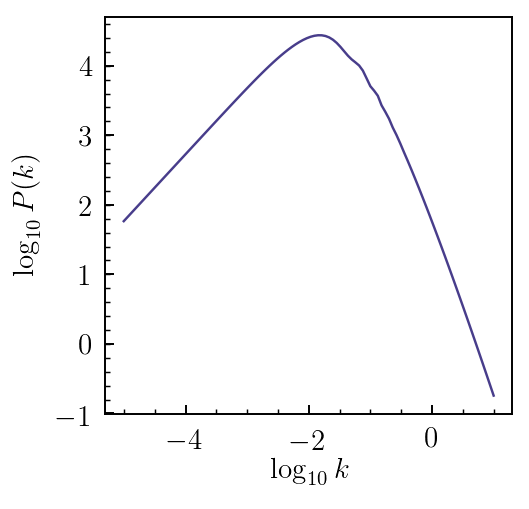

In [70]:
plot_line_points(lkt, spline_int, 
                 xlabel=r'$\log_{10} k$', ylabel=r'$\log_{10} P(k)$', figsize=3)

Note that once we have the spline coefficients for a given interval $a_i$, $b_i$, $c_i$, and $d_i$, we can compute derivatives of the interpolating spline as well as its integral. For interpolating spline 

$$s_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3,$$

we have for derivatives

\begin{eqnarray}
f^\prime(x\in[x_i,x_{i+1}])\approx s^\prime_i(x)&=&b_i + 2c_i(x-x_i)+3d_i(x-x_i)^2,\\
f^{\prime\prime}(x\in[x_i,x_{i+1}])\approx s^{\prime\prime}_i(x)&=&2c_i+6d_i(x-x_i),\\
f^{\prime\prime\prime}(x\in[x_i,x_{i+1}])\approx s^{\prime\prime\prime}_i(x)&=&6d_i
\end{eqnarray}

It is also straightforward to use interpolating spline to estimate the integral of the approximated function. For example, the integral in the interval $[x_i,x_{i+1}]$ (using change of variables $x\rightarrow\xi=x-x_i$:

$$\int\limits_{x_i}^{x_{i+1}}f(x)dx\approx \int\limits_{x_i}^{x_{i+1}}s_i(x)dx = \int\limits_{0}^{x_{i+1}-x_i}s_i(\xi)d\xi=a_i(x_{i+1}-x_i)+\frac{1}{2}b_i(x_{i+1}-x_i)^2+\frac{1}{3}c_i(x_{i+1}-x_i)^3+\frac{1}{4}d_i(x_{i+1}-x_i)^4$$

**Task 1c. (10 points)** Add calculation of the first, second, and third derivatives based on the spline interpolation to the routine <tt>cubic_spline</tt> above (3 points). Write a routine to estimate integral of f(x) in the interval [a,b] using interpolating cubic spline for f(x) and its coefficient vectors a, b, c, d. (4 points).

Plot the first three derivatives for some function (for example, the sine) and comment on their behavior (smoothness, continuity). Test the accuracy of the integral for a function for which you know the exact answer (e.g., sin (x) or e^x.) (3 points). 

- Derivative function

In [71]:
def get_derivative(xi, a, b, c, d, der_order):
    """
    Calculate the derivative of cubic spline.
    Inputs:
    xi: list of x values
    a, b, c, d: list of coefficients for the polynomial interpolation
    der_order: order of derivative to be calculated
    
    Returns a list of yi values for the derivative function
    """
    assert der_order in [1,2,3], "Please input order = 1, 2, or 3"
    yi = []
    if der_order == 1:
        for i in range(0, len(xi) - 1):
            d12 = xi[i] - xi[i+1]
            yi.append(b[i] + d12*(2*c[i] + 3*d[i]*d12))
        return yi
    if der_order == 2:
        for i in range(0, len(xi) - 1):
            d12 = xi[i] - xi[i+1]
            yi.append(2*c[i] + 6*d[i]*d12)
        return yi
    if der_order == 3:
        for i in range(0, len(xi) - 1):
            d12 = xi[i] - xi[i+1]
            yi.append(6*d[i])
        return yi

- Integration function

In [72]:
def get_integral(xi, a, b, c, d):
    """
    Calculate the integral of cubic spline.
    Inputs:
    xi: list of x values
    a, b, c, d: list of coefficients for the polynomial interpolation
    
    Returns a list of yi values for the integrated function.
    """
    integral = 0
    for i in range(0,len(xi) - 1):
        x1 = xi[i]
        x2 = xi[i + 1]
        d12 = x2 - x1
        s = d12*(a[i] + d12*(1/2*b[i] + d12*(1/3*c[i] + d12*1/4*d[i])))
        integral += s
    return integral

- Tests

In [120]:
# x^3
xmin, xmax, ntr = 0., 10, 100
xtr = np.linspace(xmin, xmax, ntr)
ftr = xtr**3
a, b, c, d = cubic_spline_coefficients(xtr, ftr)
xt = np.linspace(xmin, xmax, ntr)
spline_int = cubic_spline(xt, xtr, a, b, c, d)
print("Integral of the function with " + str(ntr) + " points:" , get_integral(xtr, a, b, c, d))
print("Expected integral:", 1/4*(10)**4 - 1/4*(1)**4)

Integral of the function with 100 points: 2500.0016818175654
Expected integral: 2499.75


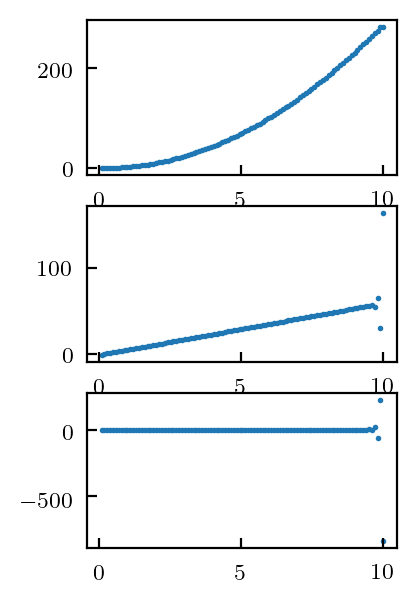

In [123]:
plt.figure(figsize=(2, 3.5))
plt.subplot(3, 1, 1)
plt.scatter(xtr[1:], get_derivative(xtr, a, b, c, d, 1), s = 1)
plt.subplot(3, 1, 2)
plt.scatter(xtr[1:], get_derivative(xtr, a, b, c, d, 2), s = 1)
plt.subplot(3, 1, 3)
plt.scatter(xtr[1:], get_derivative(xtr, a, b, c, d, 3), s = 1)

- Only some abnormalities at the end, looks like what is expected in general.

In [77]:
#sin x
xmin, xmax, ntr = 0., 2.*np.pi, 100
xtr = np.linspace(xmin, xmax, ntr)
ftr = np.sin(xtr)
a, b, c, d = cubic_spline_coefficients(xtr, ftr)
xt = np.linspace(xmin, xmax, ntr)
spline_int = cubic_spline(xt, xtr, a, b, c, d)

print("Integral of the function with " + str(ntr) + " points:" , get_integral(xtr, a, b, c, d))
print("Expected integral:", 0)

Integral of the function with 100 points: 2.5191540208892305e-08
Expected integral: 0


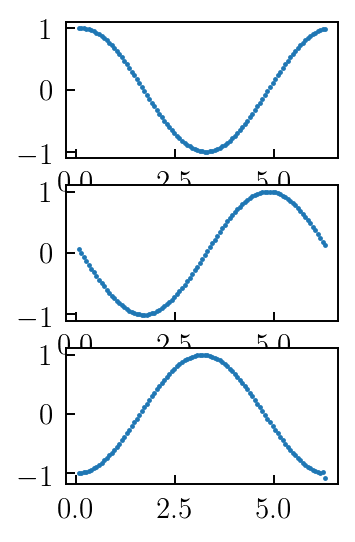

In [78]:
plt.figure(figsize=(2, 3.5))
plt.subplot(3, 1, 1)
plt.scatter(xtr[1:], get_derivative(xtr, a, b, c, d, 1), s = 1)
plt.subplot(3, 1, 2)
plt.scatter(xtr[1:], get_derivative(xtr, a, b, c, d, 2), s = 1)
plt.subplot(3, 1, 3)
plt.scatter(xtr[1:], get_derivative(xtr, a, b, c, d, 3), s = 1)

Integral of the function with 100 points: 22026.074659844227
Expected integral: 22025.465794806718


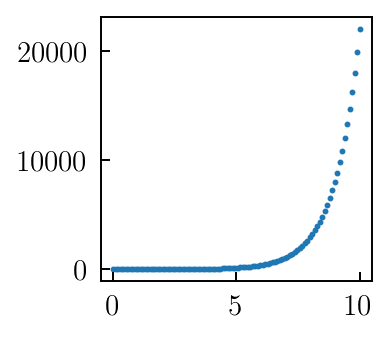

In [79]:
# e^x
xmin, xmax, ntr = 0., 10, 100
xtr = np.linspace(xmin, xmax, ntr)
ftr = np.exp(xtr)
a, b, c, d = cubic_spline_coefficients(xtr, ftr)
xt = np.linspace(xmin, xmax, ntr)
spline_int = cubic_spline(xt, xtr, a, b, c, d)
plt.figure(figsize=(2, 2))
plt.scatter(xtr, spline_int, s = 2)

print("Integral of the function with " + str(ntr) + " points:" , get_integral(xtr, a, b, c, d))
print("Expected integral:", np.exp(10) - np.exp(0))

**Task 1d. (5 points)** Suppose we want to compute the *logarithmic slope* of $P(k)$:

$$\frac{d\log_{10}P}{d\log_{10} k}=\frac{d\ln P}{d\ln k}=\frac{k}{P}\,\frac{dP}{dk}.$$

Compute this derivative using your routine implemented in 1c using <tt>lk</tt> and <tt>lPk</tt> vectors and plot this derivative as a function of <tt>lk</tt>. Compare your plot to the left panel of Figure 4 in <a href="https://arxiv.org/pdf/1407.4730">this paper</a>. It should look roughly similar, but with some differences. Describe the differences. Briefly describe what causes them. 

- In my interpoaltion result, there is no bump on the smooth part at the upper left of the graph, and there seem to be more oscillation at the end of the graph, possibly caused by the number of training points being small.

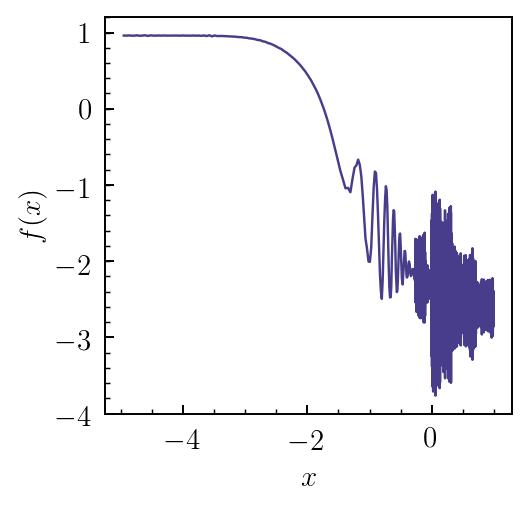

In [373]:
a, b, c, d = cubic_spline_coefficients(lk, lPk)
spline_int = cubic_spline(lkt, lk, a, b, c, d)
dlPk = get_derivative(lk, a, b, c, d, 1)
plot_line_points(lk[1:], dlPk, xlabel=r'$x$', ylabel=r'$f(x)$', figsize = 3)

**Task 1e (5 points)** Use SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a> routine to approximate <tt>lk</tt> and <tt>lPk</tt> and this class'  <tt>derivative()</tt> method to construct approximation for the derivative, as illustrated below, to compute the derivative $$d\log_{10}P/d\log_{10} k$$ Compute and plot the derivative for <tt>s=0.</tt>, <tt>s=0.0001</tt>, <tt>s=0.001</tt>, and <tt>s=0.01</tt> and comment on how the derivative changes for different values of the smoothing parameter <tt>s</tt>. Try to explain the behavior you observe. 

- For the sine function, the derivative plot doesn't change with the smoothing parameter, probably because the sine function and its numerical first derivative cosine both have a smooth behaviour. While for the power spectrum, its transformed derivative changes with the number of step size. We observe that by decreasing the smooth parameter, the fluctuations around -1.2 increases.

In [105]:
# example of use of derivative method of UnivariateSpline 
from scipy.interpolate import UnivariateSpline

ntr = 4
xtr = np.linspace(0.,2.*np.pi, ntr)
spl = UnivariateSpline(xtr, np.sin(xtr), s = 0.001) # spline approximating sine #0.
dspl = spl.derivative() # spline approximating dsin(x)/dx=cos(x)

nt = 100
xt = np.linspace(0.,2.*np.pi, nt)

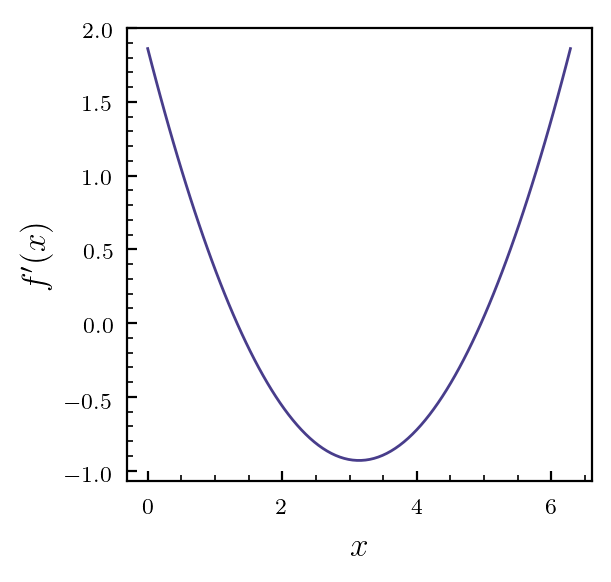

In [106]:
plot_line_points(xt, dspl(xt), xlabel=r'$x$', ylabel=r'$f^\prime(x)$', 
                 figsize=3)

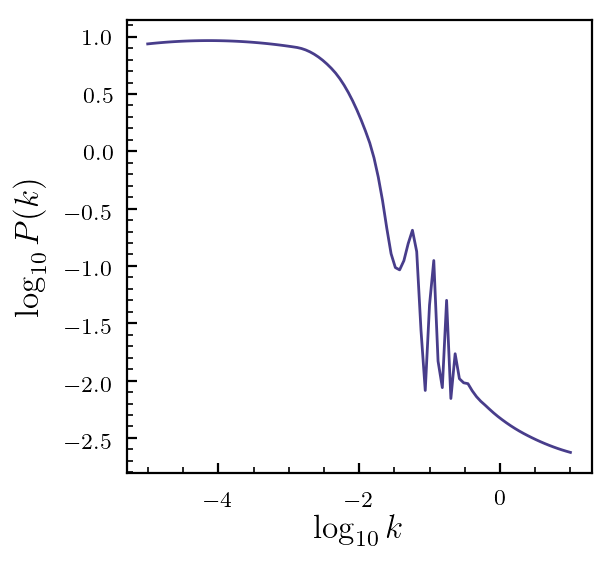

In [109]:
spl = UnivariateSpline(lk, lPk, s = 0.001)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$', ylabel=r'$\log_{10}P(k)$', 
                 figsize=3)

**Task 1f. (5 points)** Using spline to invert function. Using spline we can invert a function or, for $y=f(x)$ compute $x$ for a given $y$. For this we need to generate vectors of $x$ and $y$ and construct interpolating spline for $y$ as the argument and $x$ as a function value. The spline can then be used for input $y$ values to estimate corresponding $x$. ***This, of course, assumes that function is monotonic and that a unique value of $x$ can be obtained for a given $y$.*** So these assumptions must be satisfied for this approach to work.  

Construct interpolating spline for $y=\sin(x)$ on the interval $[0,\pi/2]$ and use it to compute $x$ for $y=1$, $y=0$, $y=0.5$. Compare the values you get to the output of <tt>np.arcsin</tt> for these values of $y$. 

In [113]:
def invert_func_splint(xtr, ftr, ft):
    """
    Uses spline approach to invert a function by estimating x for y.
    
    Parameters:
    -----------
    xtr, ftr: array like
            vectors of training points and tabulated function values
    ft: array like
            vector of test points
    Returns:
    --------
    xt: array like
        values of the polynomial at xt 
    a:  array like
        polynomial coefficients
    """
    V = np.vander(ftr, N =  np.size(ftr), increasing = True) #Vandermonde matrix
    a = np.linalg.solve(V, xtr) #solve for polynomial coefficients vector a, as a = V^{-1}f
    pfit = np.poly1d(a[::-1]) 
    xt = pfit(ft)
    return xt, a

In [126]:
xmin, xmax, ntr = 0., np.pi/2, 100
xtr = np.linspace(xmin, xmax, ntr)
ftr = np.sin(xtr)
ft = np.linspace(0, 1, 200)
xt, a = invert_func_splint(xtr, ftr, ft)

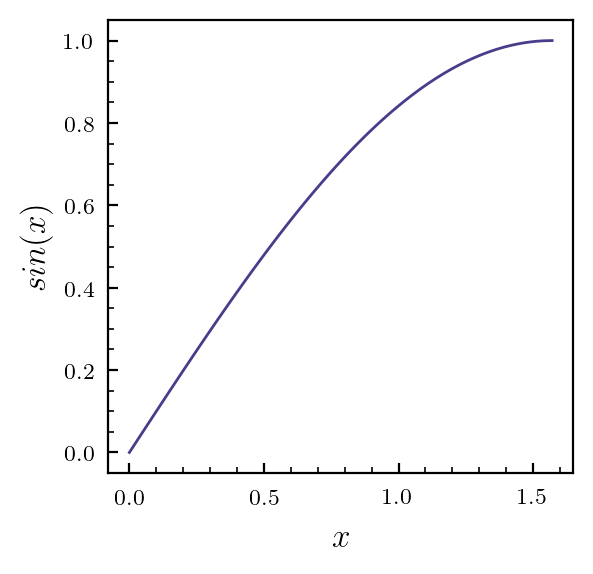

In [127]:
plot_line_points(xtr, ftr, xlabel=r'$x$', ylabel=r'$sin(x)$', 
                 figsize=3)

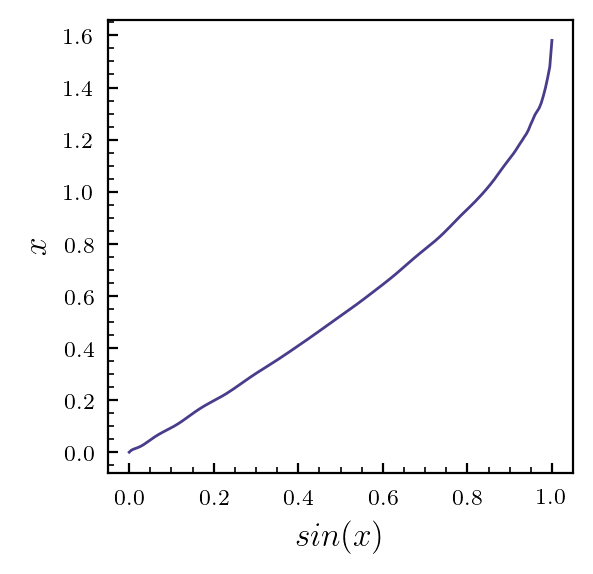

In [129]:
plot_line_points(ft, xt, xlabel=r'$sin(x)$', ylabel=r'$x$', 
                 figsize=3)

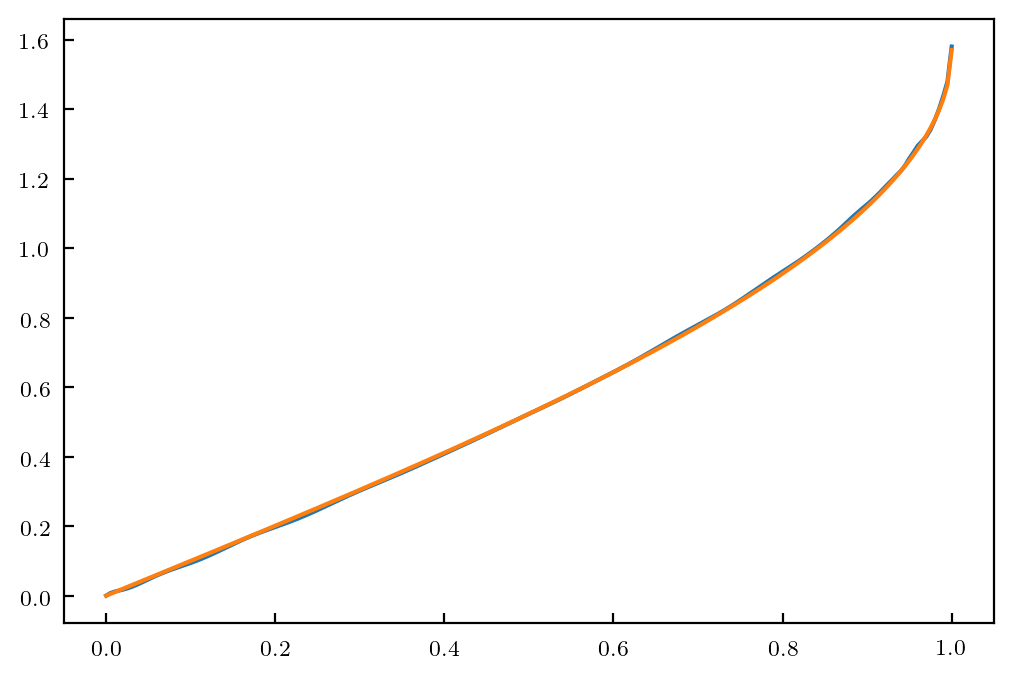

In [130]:
plt.plot(ft,xt)
plt.plot(ft, np.arcsin(ft))

- The approximated function has more fluctuations than the numerical inverse, could be eliminated by using more and more test points.

## Exercise 2 (30 points)

**Background.** During the last week we saw that computation of the luminosity distance $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ is quite expensive when we need to compute it for many parameter combinations, as is required, for example, when we want to find the combination that describe observational measurements of supernovae type Ia. 

This motivates constructing accurate approximations for $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ using methods that we've been discussing in the last couple of classes (interpolation or regression). The nonlinear dependence of $d_L$ on $z$, $\Omega_{\rm m0}$ and $\Omega_\Lambda$ via the integral (in general case) is particularly important to approximate well, as it cannot be simply obtained by rescaling from results for other model parameters, as can be done for $H_0$.

Indeed, $d_L$ is proportional to $c/H_0$ and this is the only place where $H_0$ appears in its expression. Thus, if we tabulate $\tilde{d}_L$ without  $c/H_0$ factor, it can always be added later to compute the actual value of the luminosity distance $d_L=c/H_0\,\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$. Given this simple dependence of $d_L$ on $H_0$, there is no need to construct approximation of $d_L$ as a function of $H_0$. We can simply scale it. 

**Goal of the exercise.** The goal of this exercise is for you to find an optimal approximation of $\tilde{d}_L$ (i.e. $d_L$ without $c/H_0$ factor) as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ (that is approximation should be two-dimensional, not two separate 1d approximations as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$) for a given single value of $z$. 

"Optimal" here means that provides target accuracy of the approximation with the smallest training set of tabulated function values. Suppose our target fractional accuracy for $\tilde{d}_L$ is $10^{-4}$. Experiment with 2D polynomial and piecewise spline interpolation for $\tilde{d}_L$ with different size of training point set and their spacing along $x$ and $y$ (i.e. along $\Omega_{\rm m0}$ and $\Omega_\Lambda$ in this exercise) using codes and examples below and identify the approach that reaches this target accuracy with the smallest training sample. 

#### What you are learning in this exercise

* Approximating functions of two parameters (i.e. approximation in 2D) 

* Different methods of approximating smooth functions

* That method that is best for one problem may not be the best for another problem (this is why multiple methods exist and why we study more than one method of approximating functions). 


#### Group work

This is "open-ended" exercise of the kind that is often encountered in research. Open-ended means that the results are not obvious from the beginning and your route to conlcusion is not prescribed, but requires thinking and experimentation. 

You are expected to work on this exercise in a group. Group assignment is announced when this homework is distributed. 
Try to work collaboratively. You can split the various parts of the task among group members and then combine your work, or do this independently and then discuss your findings among your group and reach consensus conclusion. Use in-person meetings or slack messaging (you can create your own private or public channel for these discussions).  Each member of the group should submit results of their and group work in their own notebook via Canvas.

**Task 2a. (15 points)** Write a routine that constructs 2D *spline* approximation of $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ for a given input single value of redshift $z$ and for ranges of the $\Omega_{\rm m0}$ and $\Omega_\Lambda)$ parameters of $\Omega_{\rm m0}\in [0.1]$ and $\Omega_\Lambda\in[0.,1]$. Experiment with different training point spacings (for example, evenly spaced vs Chebyshev nodes) and try to find the spacing that reaches the target fractional accuracy of $10^{-4}$ with the smallest size of the training set for any $z$ in the interval $z\in [0,2]$. 

There are several different SciPy routines that can be used for this.  I recommend using routine <tt>scipy.interpolate.RectBivariateSpline(x, y, z, s=0, kx=3, ky=3)</tt>, where $z$ is the array of function values tabulated at training points in vectors $x$ and $y$, $s=0$ indicates interpolation (no smoothing), parameters <tt>kx=3, ky=3</tt> specify that cubic splines should be used in $x$ and $y$ variables. Example of using this function is shown below (you can read about other available options and see examples of how they are used <a href="https://mmas.github.io/interpolation-scipy">here</a>).

Example below uses a numpy function <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html"><tt>np.meshgrid</tt></a> to generate 2D grids of values of $x$ and $y$ from 1D vectors defined using <tt>np.linspace</tt>

Note the dimensions of <tt>ftr</tt> and <tt>ft</tt> generated in the example above. When you work on this exercise, if you use the above example, make sure your function for computing $\tilde{d}_L$ can handle input of 2d grids like <tt>xgrid</tt> and <tt>ygrid</tt>. 

In [81]:
from codes.plot_utils import plot_color_map
from scipy.interpolate import RectBivariateSpline
from codes.cosmology import d_L_vectorized
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [82]:
def get_result_matrix(array1, array2, z, H0): 
    f = []
    for a in array2:
        l1 = []
        for b in array1:
            l1.append(d_L_vectorized(z = z, H0 = H0, Om0 = a, OmL = b))
        f.append(l1)
    return f

def chebyshev_nodes1(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos((2.*np.arange(N+1)+1)*np.pi/(2.*(N+1))))

def chebyshev_nodes2(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos(np.arange(N+1)*np.pi/N))

- Evenly spaced points

In [83]:
#generate training set
lmin, lmax, ntr = 0.0, 1.0, 10
Om0tr = np.linspace(lmin, lmax, ntr)
OmLtr = np.linspace(lmin, lmax, ntr)
#Om0grid, OmLgrid = np.meshgrid(Om0tr, OmLtr, sparse = False, indexing='ij')
ftr = get_result_matrix(Om0tr, OmLtr, z = 2., H0 = 70.)
# generate test vectors
nt = 100
Om0t = np.linspace(lmin, lmax, nt)
OmLt = np.linspace(lmin, lmax, nt)
# generate test grid & calculate error
xgt, ygt = np.meshgrid(Om0t, OmLt, sparse = False, indexing='ij')
spl2d = RectBivariateSpline(Om0tr, OmLtr, np.array(ftr), s=0.1, kx=3, ky=3)
ft = spl2d(Om0t, OmLt)
ft_calc = get_result_matrix(Om0t, OmLt, z = 2., H0 = 70.)
ft_err = np.log10(np.maximum(2.e-16, np.abs(1.- ft_calc/ft)))

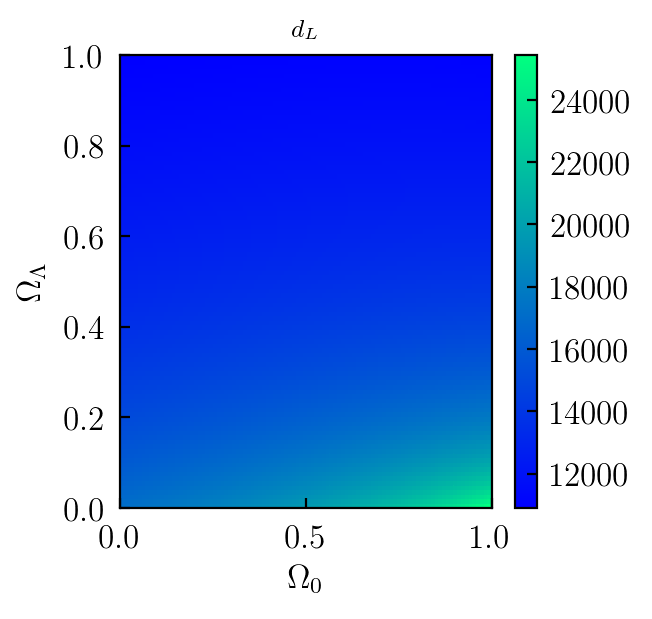

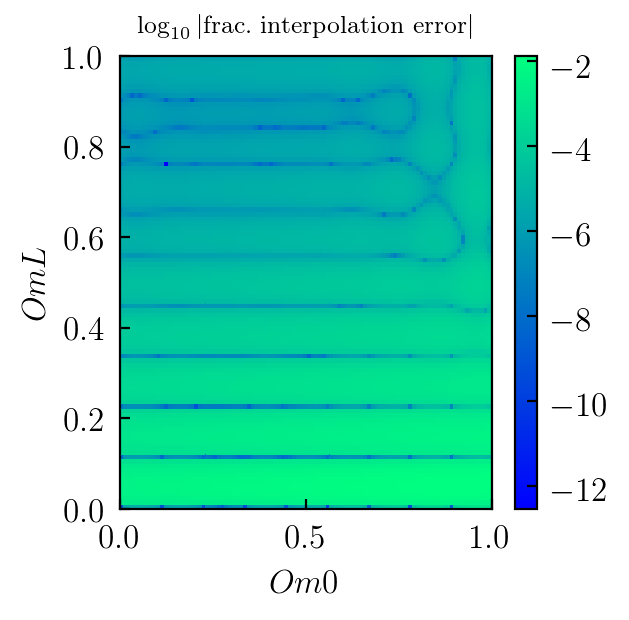

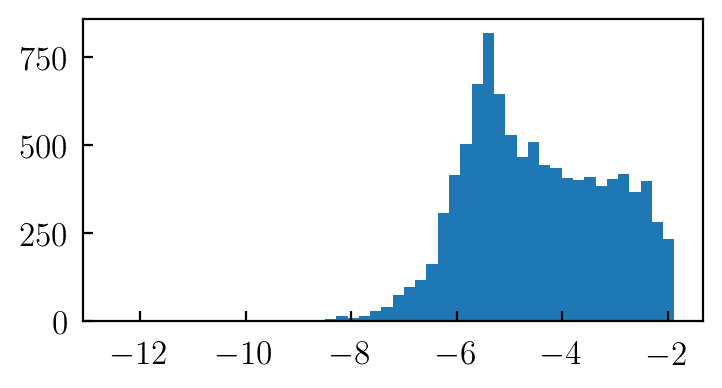

In [84]:
#result
plot_color_map(xgt, ygt, np.array(ft_calc).T, xlim = [lmin,lmax], ylim = [lmin,lmax], 
                   xlabel = '$\Omega_0$', ylabel = '$\Omega_\Lambda$', cmap='winter', colorbar=True, 
                   plot_title=r'$d_L$', 
                   figsize = 3.0)
#error
plot_color_map(xgt, ygt, ft_err.T, xlim = [lmin,lmax], ylim = [lmin,lmax], 
                   xlabel = '$Om0$', ylabel = '$OmL$', cmap='winter', colorbar=True, 
                   plot_title=r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', 
                   figsize = 3.0)
#histogram of error
plt.figure(figsize=(4,2))
a = plt.hist(ft_err.flatten(), bins = 50)

In [85]:
def test_diff_methods(method, lmin = 0, lmax = 1, nnt = 10, ntstep = 10):
    x = np.empty(0)
    ymax = np.empty(0)
    ymin = np.empty(0)
    y = np.empty(0)
    for ntr in np.arange(10, 10 + nnt*ntstep, 10):
        x = np.append(x, ntr)
        if method == "even":
            Om0tr = np.linspace(lmin, lmax, ntr)
            OmLtr = np.linspace(lmin, lmax, ntr)
        elif method == "cheb1":
            Om0tr = chebyshev_nodes1(lmin, lmax, ntr)[::-1]
            OmLtr = chebyshev_nodes1(lmin, lmax, ntr)[::-1]
        elif method == "cheb2":
            Om0tr = chebyshev_nodes2(lmin, lmax, ntr)[::-1]
            OmLtr = chebyshev_nodes2(lmin, lmax, ntr)[::-1]
        ftr = get_result_matrix(Om0tr, OmLtr, z = 2., H0 = 70.)
        spl2d = RectBivariateSpline(Om0tr, OmLtr, np.array(ftr), s=0.1, kx=3, ky=3)
        Om0t = np.linspace(lmin, lmax, nt)
        OmLt = np.linspace(lmin, lmax, nt)
        ft = spl2d(Om0t, OmLt)
        ft_calc = get_result_matrix(Om0t, OmLt, z = 2., H0 = 70.)
        ft_err = np.log10(np.maximum(2.e-16, np.abs(1.- ft_calc/ft)))
        ft_err = ft_err[1:99, 1:99]
        ymax = np.append(ymax, ft_err.max())
        ymin = np.append(ymin, ft_err.min())
        y = np.append(y, np.median(ft_err))
    return (x, y, ymax, ymin)

In [86]:
xeven, yeven, yevenmax, yevenmin = test_diff_methods(method = 'even', nnt = 10)
xcheb1, ycheb1, ycheb1max, ycheb1min = test_diff_methods(method = 'cheb1', nnt = 10)
xcheb2, ycheb2, ycheb2max, ycheb2min = test_diff_methods(method = 'cheb2', nnt = 10)

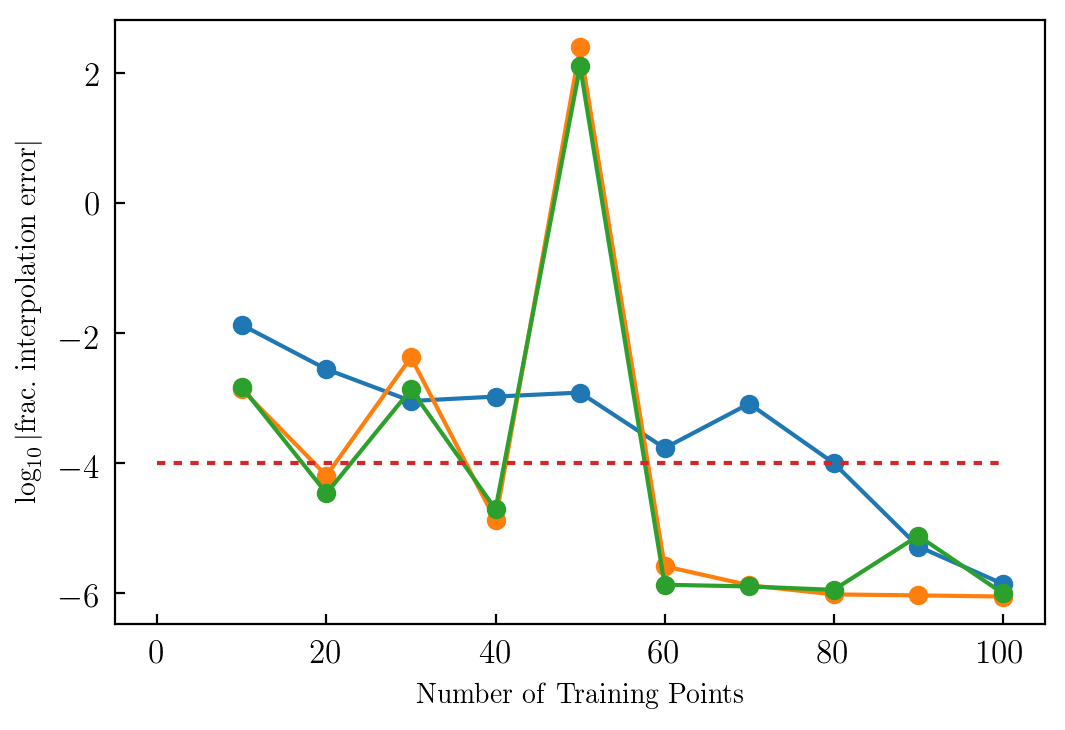

In [87]:
plt.plot(xeven, yevenmax, '-o')
plt.plot(xcheb1, ycheb1max, '-o')
plt.plot(xcheb2, ycheb2max, '-o')
plt.plot([0,100], [-4,-4], ':')
a = plt.xlabel(r'$\rm Number\ of\ Training\ Points$', fontsize = 10)
a = plt.ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)

Text(0.5,0.98,'Number of Training Points vs. Error for 3 Methods')

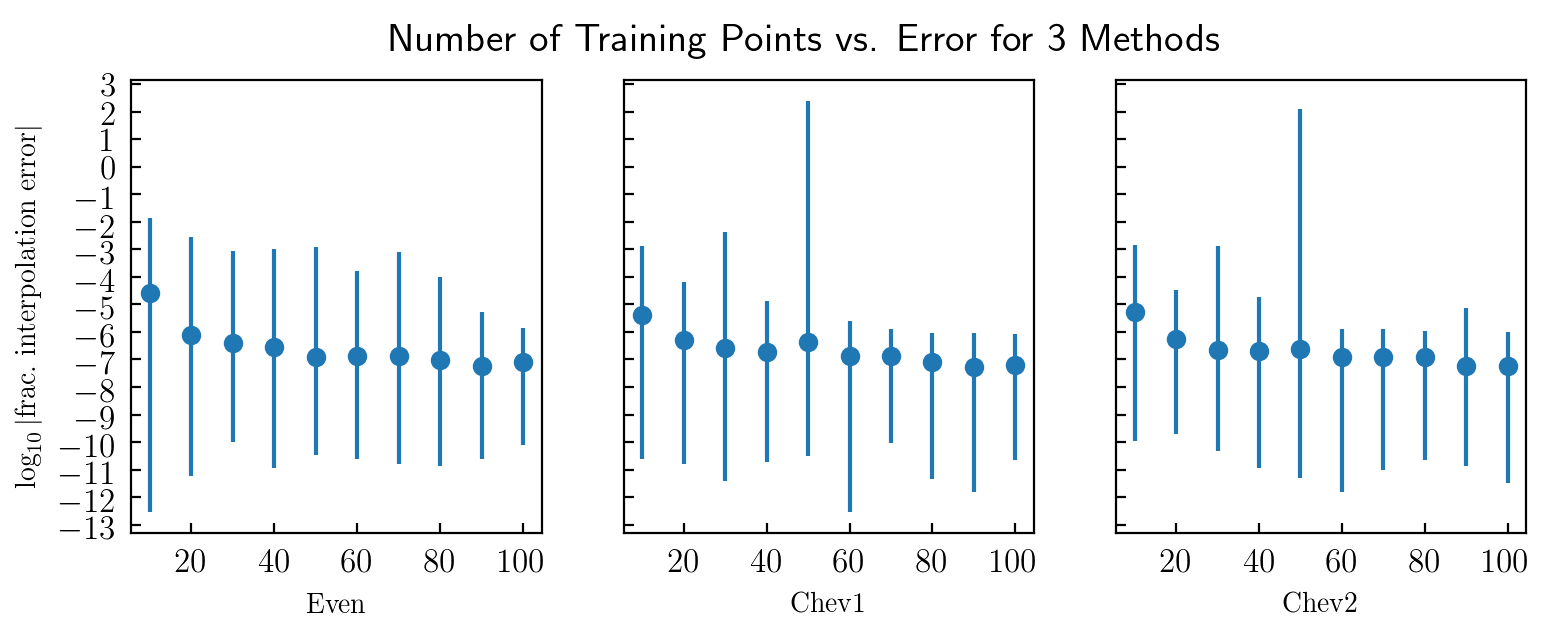

In [88]:
#compare the maximun and minimum
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.locator_params(axis='y', nbins = 20)
params = {'xtick.labelsize': 8,
         'ytick.labelsize': 8}
plt.rcParams.update(params)
axs[0].errorbar(xeven, yeven, yerr = [yeven - yevenmin, yevenmax - yeven], fmt='o')
axs[0].set_xlabel(r'$\rm Even$', fontsize = 10)
axs[0].set_ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)
axs[1].errorbar(xcheb1, ycheb1, yerr = [ycheb1 - ycheb1min, ycheb1max - ycheb1], fmt='o')
axs[1].set_xlabel(r'$\rm Chev1$', fontsize = 10)
axs[2].errorbar(xcheb2, ycheb2, yerr = [ycheb2 - ycheb2min, ycheb2max - ycheb2], fmt='o')
axs[2].set_xlabel(r'$\rm Chev2$', fontsize = 10)
fig.suptitle('Number of Training Points vs. Error for 3 Methods')

- For spline interpolation, the result for evenly spaced points is the worst overall but it is the most stable, reaching the required accuracy after 80 training points. For chev1 and 2, although target accuracy was reached at 20 points, the maximum accuracy fluctuates back and forth, and reached a climax for 50 training points for some reason. This abnormality might have been caused by the boundary treatment of the Chebyshev functions. 

**Task 2b (15 points).** Although there is no convenient Scipy routine for polynomial interpolation in 2d, we can use the same approach as was used in Task 1a to construct interpolating polynomial in 2d, as is done in the following routine (a modified version of the routine provided <a href="https://stackoverflow.com/questions/33964913/equivalent-of-polyfit-for-a-2d-polynomial-in-python">here</a>). 

Write a routine that constructs 2D *polynomial* approximation of $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ for a given input single value of redshift $z$ and for ranges of the $\Omega_{\rm m0}$ and $\Omega_\Lambda)$ parameters of $\Omega_{\rm m0}\in [0.1]$ and $\Omega_\Lambda\in[0.,1]$. Just like for the spline in 2a, experiment with different training point spacings (for example, evenly spaced vs Chebyshev nodes) and try to find the spacing that reaches the target fractional accuracy of $10^{-4}$ with the smallest size of the training set for any $z$ in the interval $z\in [0,2]$. 

State your conclusions about the optimal method for approximating $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ supporting it with tests of fractional accuracy and plots, as needed. Each of the groups will make a brief presentation of their results in class Friday of next week.

In [89]:
def polyfit2d(xtr, ytr, ftr, kx = 3, ky = 3, order = None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resulting fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters:
    ----------
    xtr, ytr: array-like, 1d
        xtr and ytr coordinates.
    ftr: 2d numpy array
        f(xgtr, ygtr) values evaluated on meshgrid of xtr and ytr vectors to fit by polynomial
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns:
    -------
    Return paramters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = np.meshgrid(xtr, ytr)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    V = np.zeros((coeffs.size, x.size))

    # construct Vandermonde matrix: for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        V[index] = arr.flatten()
        
    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(V.T, np.ravel(ftr), rcond=None)[0]

In [90]:
lmin, lmax, n = 0.0, 1.0, 20
Om0tr = np.linspace(lmin, lmax, n)
OmLtr = np.linspace(lmin, lmax, n)
ftr = get_result_matrix(Om0tr, OmLtr, z = 2., H0 = 70.)
px, py = 14, 14 #polynomial order in x and y direction
# get coefficients of best 2d polynomial
a = polyfit2d(Om0tr, OmLtr, ftr, kx=px, ky=py, order=None)
ft = np.polynomial.polynomial.polyval2d(xgt, ygt, a.reshape((px+1,py+1)))
# generate test vectors
nt = 100
Om0t = np.linspace(lmin, lmax, nt)
OmLt = np.linspace(lmin, lmax, nt)
# generate test grid
xgt, ygt = np.meshgrid(Om0t, OmLt, sparse = False, indexing='ij')
# compute polynomial values on the grid of test points
ft_calc = get_result_matrix(Om0t, OmLt, z = 2., H0 = 70.)
ft_err = np.log10(np.maximum(2.e-16, np.abs(1.- ft_calc/ft)))

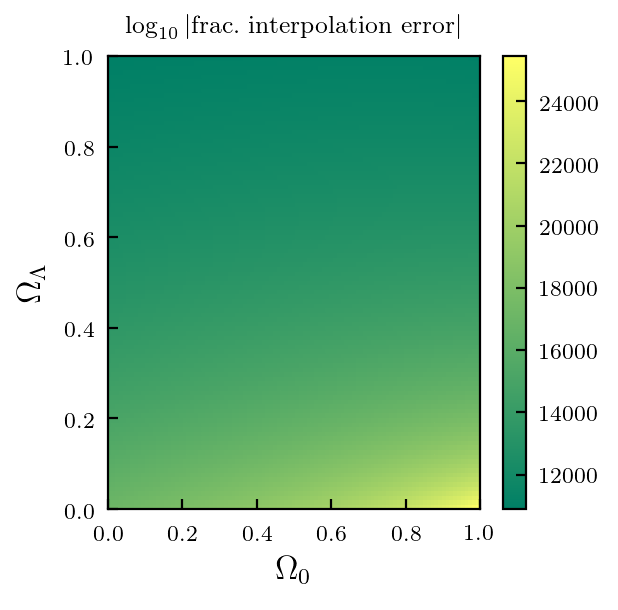

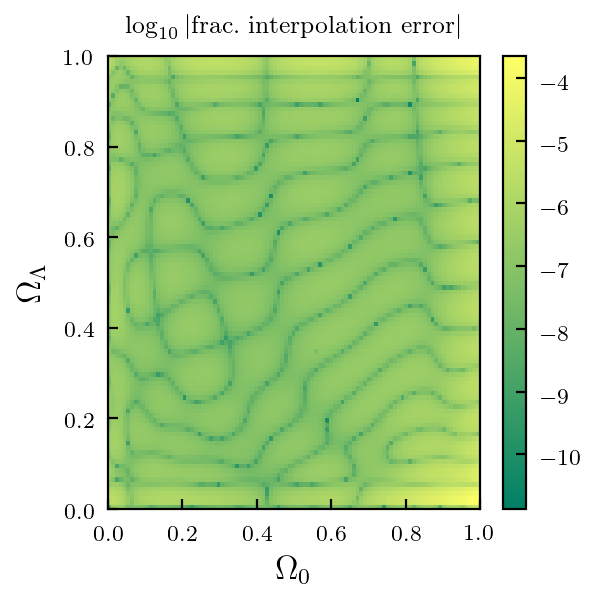

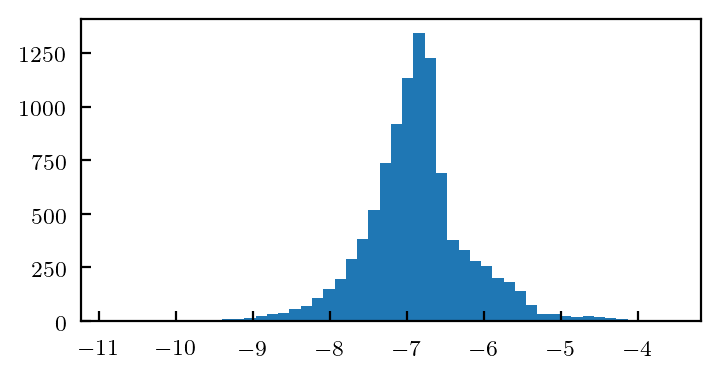

In [91]:
#result
plot_color_map(xgt, ygt, ft.T, xlim = [lmin,lmax], ylim = [lmin,lmax], 
                   xlabel = '$\Omega_0$', ylabel = '$\Omega_\Lambda$', cmap='summer', colorbar=True, 
                   plot_title=r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', 
                   figsize = 3.0)
#error
plot_color_map(xgt, ygt, ft_err.T, xlim = [lmin,lmax], ylim = [lmin,lmax], 
                   xlabel = '$\Omega_0$', ylabel = '$\Omega_\Lambda$', cmap='summer', colorbar=True, 
                   plot_title=r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', 
                   figsize = 3.0)
#histogram of error
plt.figure(figsize=(4,2))
a = plt.hist(ft_err.flatten(), bins = 50)

- The error distribution of polynomial interpolation is different from spline interpolation, it resembles a normal distribution more.

In [92]:
def test_diff_degree_poly(method, plower, pupper, ntr):
    '''
    '''
    x = np.empty(0)
    ymax = np.empty(0)
    ymin = np.empty(0)
    y = np.empty(0)
    if method == "even":
        Om0tr = np.linspace(lmin, lmax, ntr)
        OmLtr = np.linspace(lmin, lmax, ntr)
    elif method == "cheb1":
        Om0tr = chebyshev_nodes1(lmin, lmax, ntr)[::-1]
        OmLtr = chebyshev_nodes1(lmin, lmax, ntr)[::-1]
    elif method == "cheb2":
        Om0tr = chebyshev_nodes2(lmin, lmax, ntr)[::-1]
        OmLtr = chebyshev_nodes2(lmin, lmax, ntr)[::-1]
    ftr = get_result_matrix(Om0tr, OmLtr, z = 2., H0 = 70.)
    for p in np.arange(plower, pupper + 1):
        x = np.append(x, p)
        a = polyfit2d(Om0tr, OmLtr, ftr, kx=p, ky=p, order=None)
        nt = 100
        Om0t = np.linspace(lmin, lmax, nt)
        OmLt = np.linspace(lmin, lmax, nt)
        xgt, ygt = np.meshgrid(Om0t, OmLt, sparse = False, indexing='ij')
        ft = np.polynomial.polynomial.polyval2d(xgt, ygt, a.reshape((p+1,p+1)))
        ft_calc = get_result_matrix(Om0t, OmLt, z = 2., H0 = 70.)
        ft_err = np.log10(np.maximum(2.e-16, np.abs(1.- ft_calc/ft)))
        ft_err = ft_err[1:99, 1:99]
        ymax = np.append(ymax, ft_err.max())
        ymin = np.append(ymin, ft_err.min())
        y = np.append(y, np.median(ft_err))
    return (x, y, ymax, ymin)


def test_diff_ntr_poly(method, px, py, lmin = 0, lmax = 1, nnt = 10, ntstep = 10):
    '''
    -------
    px, py: degree of polynomial on x and y
    '''
    x = np.empty(0)
    ymax = np.empty(0)
    ymin = np.empty(0)
    y = np.empty(0)
    for ntr in np.arange(20, 20 + nnt*ntstep, ntstep):
        x = np.append(x, ntr)
        if method == "even":
            Om0tr = np.linspace(lmin, lmax, ntr)
            OmLtr = np.linspace(lmin, lmax, ntr)
        elif method == "cheb1":
            Om0tr = chebyshev_nodes1(lmin, lmax, ntr)[::-1]
            OmLtr = chebyshev_nodes1(lmin, lmax, ntr)[::-1]
        elif method == "cheb2":
            Om0tr = chebyshev_nodes2(lmin, lmax, ntr)[::-1]
            OmLtr = chebyshev_nodes2(lmin, lmax, ntr)[::-1]
        ftr = get_result_matrix(Om0tr, OmLtr, z = 2., H0 = 70.)
        a = polyfit2d(Om0tr, OmLtr, ftr, kx=px, ky=py, order=None)
        nt = 100
        Om0t = np.linspace(lmin, lmax, nt)
        OmLt = np.linspace(lmin, lmax, nt)
        xgt, ygt = np.meshgrid(Om0t, OmLt, sparse = False, indexing='ij')
        ft = np.polynomial.polynomial.polyval2d(xgt, ygt, a.reshape((px+1,py+1)))
        ft_calc = get_result_matrix(Om0t, OmLt, z = 2., H0 = 70.)
        ft_err = np.log10(np.maximum(2.e-16, np.abs(1.- ft_calc/ft)))
        ft_err = ft_err[1:99, 1:99]
        ymax = np.append(ymax, ft_err.max())
        ymin = np.append(ymin, ft_err.min())
        y = np.append(y, np.median(ft_err))
    return (x, y, ymax, ymin)

- 10 test points, 3 methods and vary the degree of polynomial

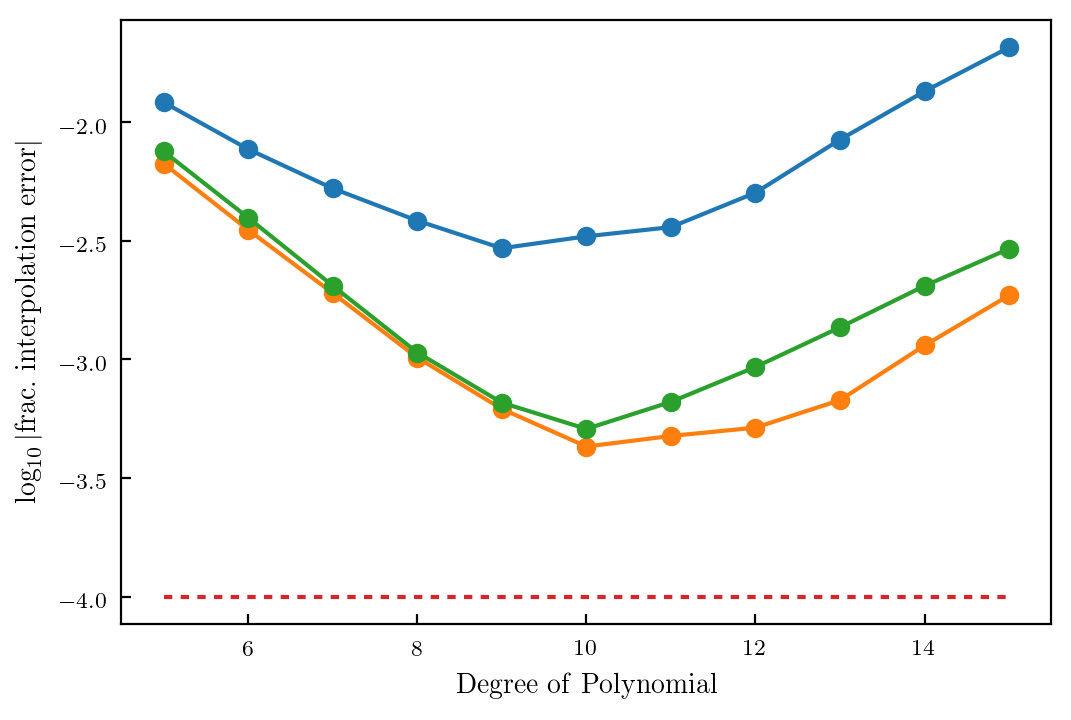

In [93]:
xeven, yeven, yevenmax, yevenmin = test_diff_degree_poly('even', 5, 15, 10)
xcheb1, ycheb1, ycheb1max, ycheb1min = test_diff_degree_poly('cheb1', 5, 15, 10)
xcheb2, ycheb2, ycheb2max, ycheb2min = test_diff_degree_poly('cheb2', 5, 15, 10)
plt.plot(xeven, yevenmax, '-o')
plt.plot(xcheb1, ycheb1max, '-o')
plt.plot(xcheb2, ycheb2max, '-o')
plt.plot([5,15], [-4,-4], ':')
a = plt.xlabel(r'$\rm Degree\ of\ Polynomial$', fontsize = 10)
a = plt.ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)

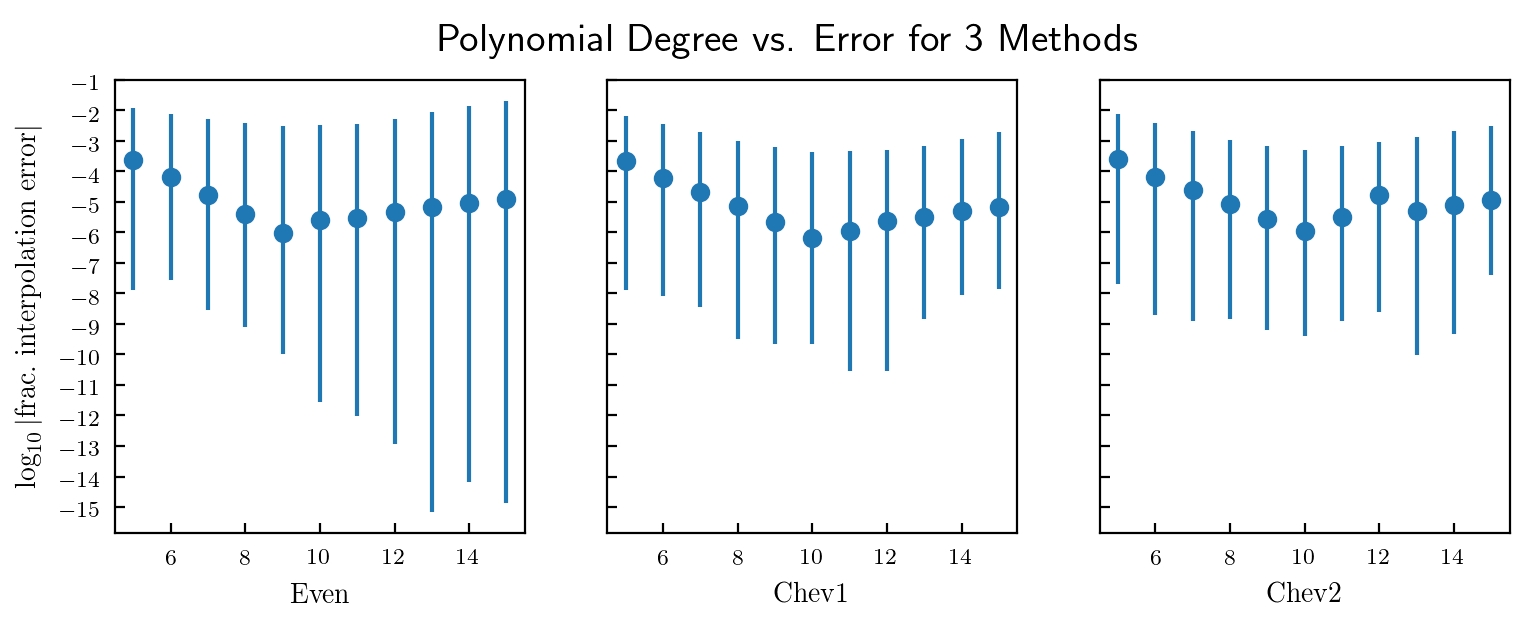

In [94]:
#compare the maximun and minimum
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.locator_params(axis='y', nbins = 20)
params = {'xtick.labelsize': 8,
         'ytick.labelsize': 8}
plt.rcParams.update(params)
axs[0].errorbar(xeven, yeven, yerr = [yeven - yevenmin, yevenmax - yeven], fmt='o')
axs[0].set_xlabel(r'$\rm Even$', fontsize = 10)
axs[0].set_ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)
axs[1].errorbar(xcheb1, ycheb1, yerr = [ycheb1 - ycheb1min, ycheb1max - ycheb1], fmt='o')
axs[1].set_xlabel(r'$\rm Chev1$', fontsize = 10)
axs[2].errorbar(xcheb2, ycheb2, yerr = [ycheb2 - ycheb2min, ycheb2max - ycheb2], fmt='o')
axs[2].set_xlabel(r'$\rm Chev2$', fontsize = 10)
a = fig.suptitle('Polynomial Degree vs. Error for 3 Methods')

- 20 test points, 3 methods and vary the degree of polynomial

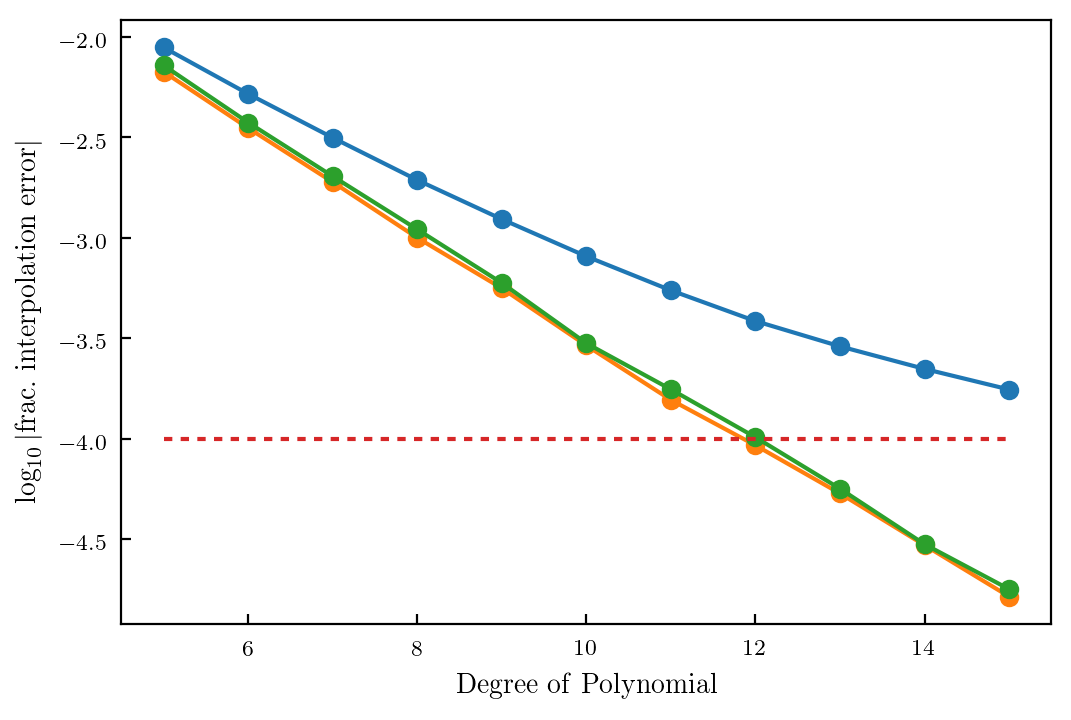

In [95]:
xeven, yeven, yevenmax, yevenmin = test_diff_degree_poly('even', 5, 15, 20)
xcheb1, ycheb1, ycheb1max, ycheb1min = test_diff_degree_poly('cheb1', 5, 15, 20)
xcheb2, ycheb2, ycheb2max, ycheb2min = test_diff_degree_poly('cheb2', 5, 15, 20)
plt.plot(xeven, yevenmax, '-o')
plt.plot(xcheb1, ycheb1max, '-o')
plt.plot(xcheb2, ycheb2max, '-o')
plt.plot([5,15], [-4,-4], ':')
a = plt.xlabel(r'$\rm Degree\ of\ Polynomial$', fontsize = 10)
a = plt.ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)

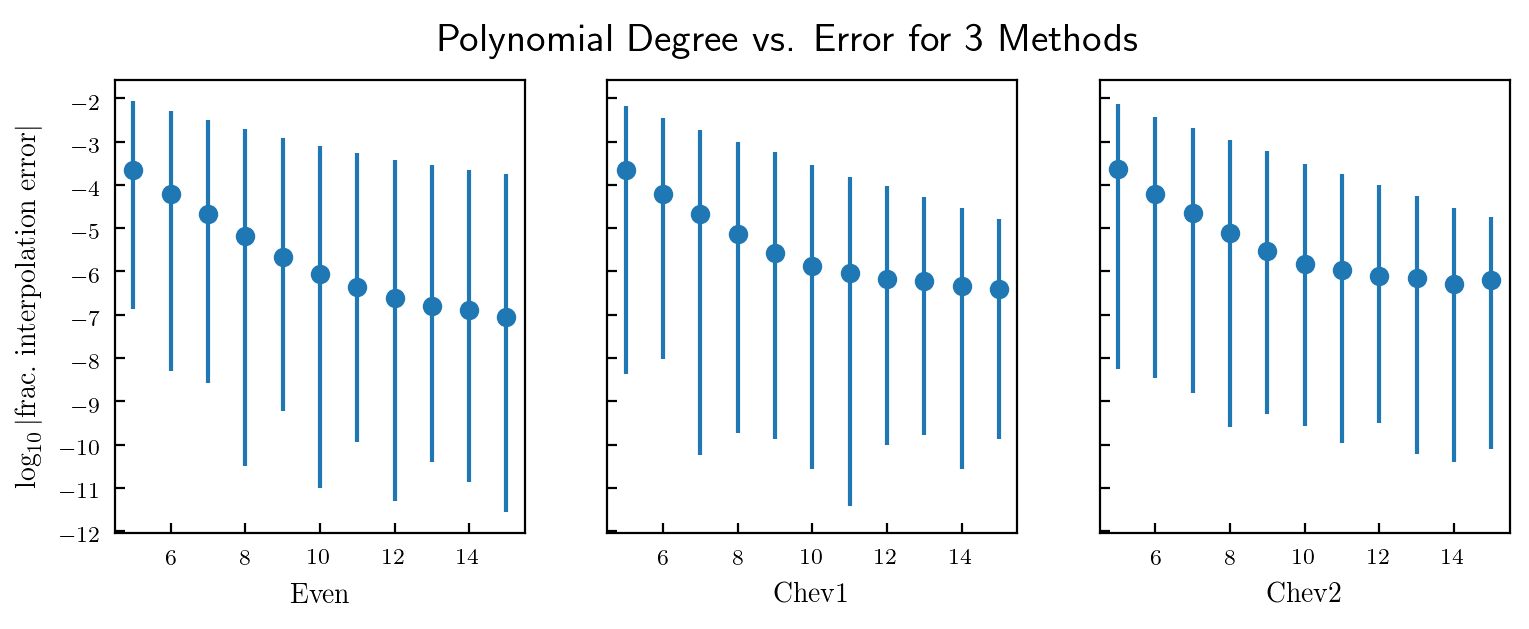

In [96]:
#compare the maximun and minimum
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.locator_params(axis='y', nbins = 20)
params = {'xtick.labelsize': 8,
         'ytick.labelsize': 8}
plt.rcParams.update(params)
axs[0].errorbar(xeven, yeven, yerr = [yeven - yevenmin, yevenmax - yeven], fmt='o')
axs[0].set_xlabel(r'$\rm Even$', fontsize = 10)
axs[0].set_ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)
axs[1].errorbar(xcheb1, ycheb1, yerr = [ycheb1 - ycheb1min, ycheb1max - ycheb1], fmt='o')
axs[1].set_xlabel(r'$\rm Chev1$', fontsize = 10)
axs[2].errorbar(xcheb2, ycheb2, yerr = [ycheb2 - ycheb2min, ycheb2max - ycheb2], fmt='o')
axs[2].set_xlabel(r'$\rm Chev2$', fontsize = 10)
a = fig.suptitle('Polynomial Degree vs. Error for 3 Methods')

- 3 methods and 14th degree for both x and y, vary number of training points

In [97]:
xeven, yeven, yevenmax, yevenmin = test_diff_ntr_poly('even', 12, 12, lmin = 0, lmax = 1, nnt = 10, ntstep = 5)
xcheb1, ycheb1, ycheb1max, ycheb1min = test_diff_ntr_poly('cheb1', 12, 12, lmin = 0, lmax = 1, nnt = 10, ntstep = 5)
xcheb2, ycheb2, ycheb2max, ycheb2min = test_diff_ntr_poly('cheb2', 12, 12, lmin = 0, lmax = 1, nnt = 10, ntstep = 5)

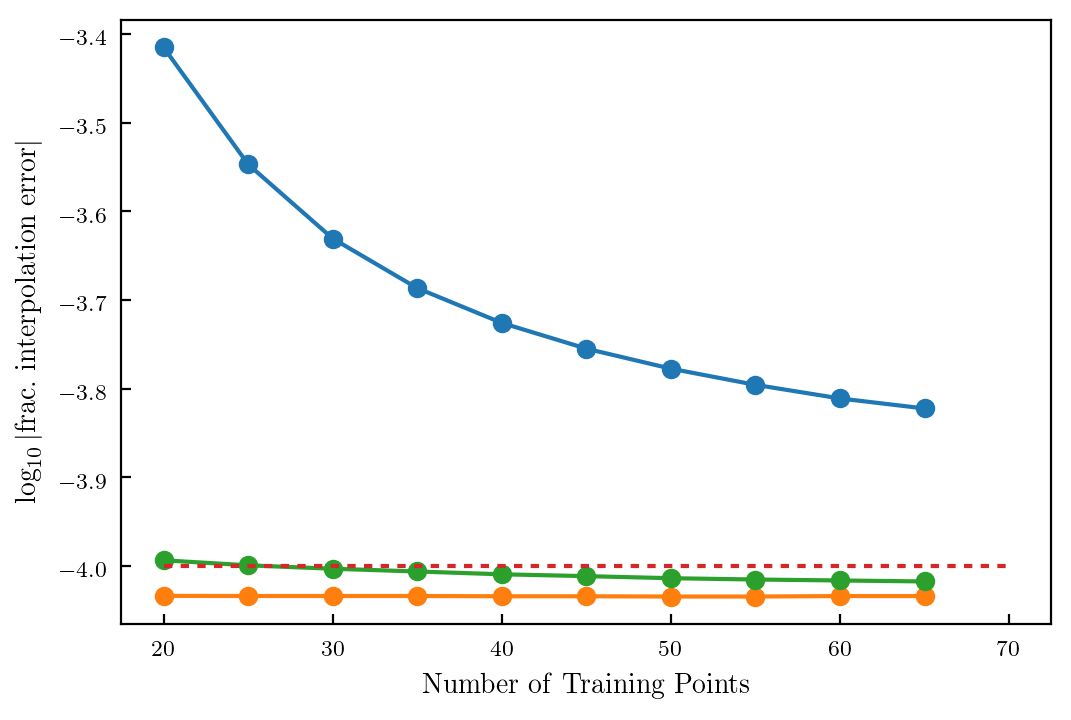

In [98]:
plt.plot(xeven, yevenmax, '-o')
plt.plot(xcheb1, ycheb1max, '-o')
plt.plot(xcheb2, ycheb2max, '-o')
plt.plot([20,70], [-4,-4], ':')
a = plt.xlabel(r'$\rm Number\ of\ Training\ Points$', fontsize = 10)
a = plt.ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)

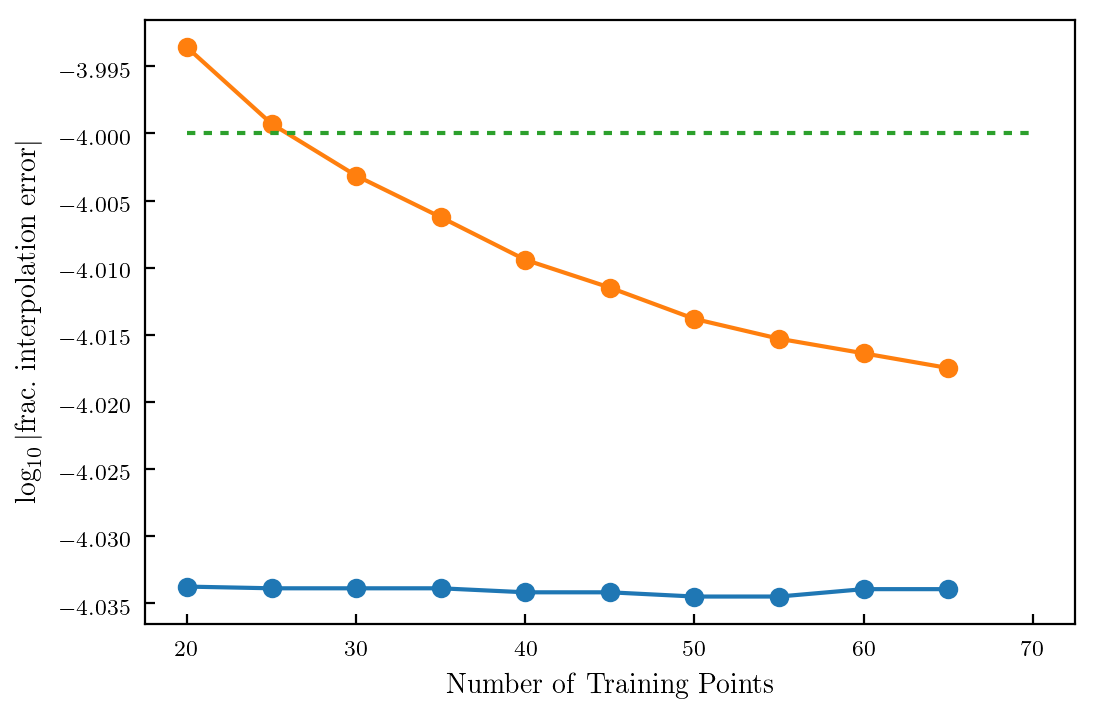

In [99]:
plt.plot(xcheb1, ycheb1max, '-o')
plt.plot(xcheb2, ycheb2max, '-o')
plt.plot([20,70], [-4,-4], ':')
a = plt.xlabel(r'$\rm Number\ of\ Training\ Points$', fontsize = 10)
a = plt.ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)

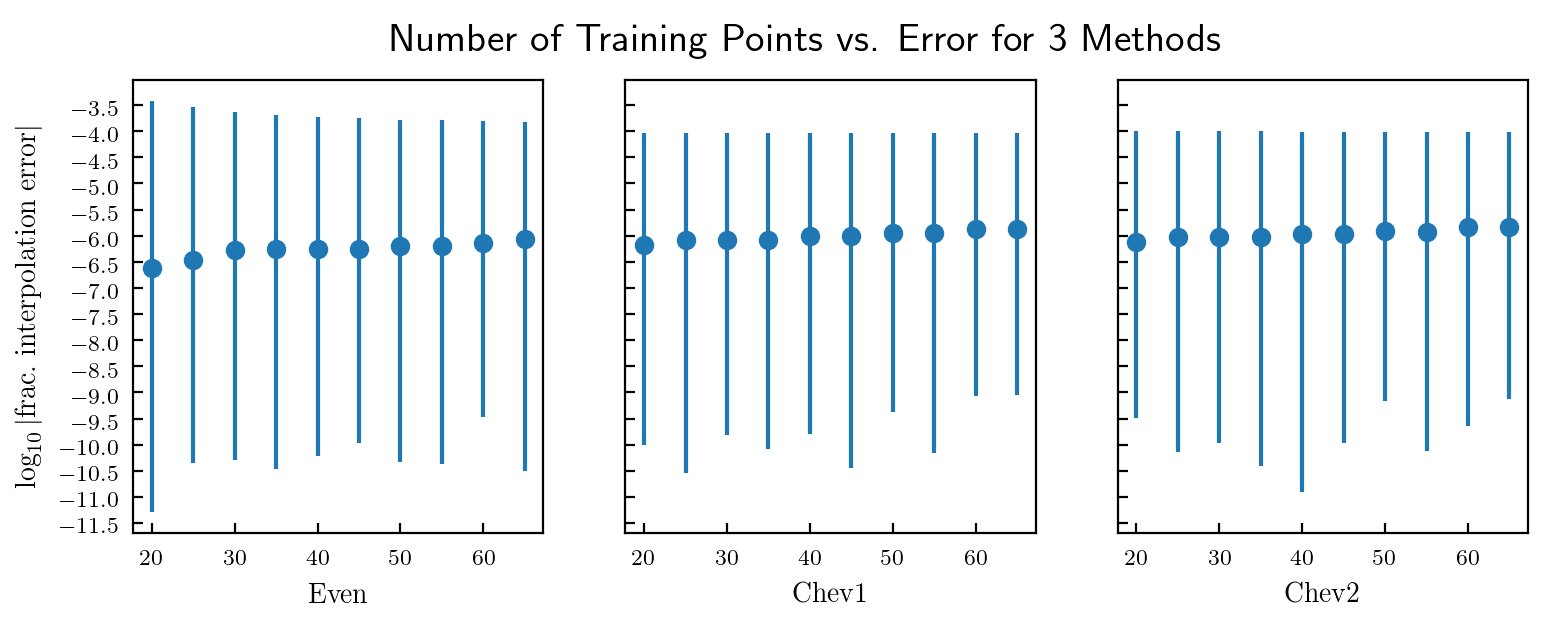

In [100]:
#compare the maximun and minimum
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.locator_params(axis='y', nbins = 20)
params = {'xtick.labelsize': 8,
         'ytick.labelsize': 8}
plt.rcParams.update(params)
axs[0].errorbar(xeven, yeven, yerr = [yeven - yevenmin, yevenmax - yeven], fmt='o')
axs[0].set_xlabel(r'$\rm Even$', fontsize = 10)
axs[0].set_ylabel(r'$\log_{10}\vert\rm frac.\ interpolation\ error\vert$', fontsize = 10)
axs[1].errorbar(xcheb1, ycheb1, yerr = [ycheb1 - ycheb1min, ycheb1max - ycheb1], fmt='o')
axs[1].set_xlabel(r'$\rm Chev1$', fontsize = 10)
axs[2].errorbar(xcheb2, ycheb2, yerr = [ycheb2 - ycheb2min, ycheb2max - ycheb2], fmt='o')
axs[2].set_xlabel(r'$\rm Chev2$', fontsize = 10)
a = fig.suptitle('Number of Training Points vs. Error for 3 Methods')

- For polynomial interpolation, the behaviour is more stable than spline interpolation. We fixed the polynomial at degree 13 for it is where the accuracy reached 10^-4 at 20 training points. Then, varying the number of training points, we can see that Chebyshev nodes again have a better performance than evenly spaced ones, chev1 is slightly better than chev2, reaching the desired accuracy at 20 training points, chev2 at 25. 
- Also, comparing the distribution of log10 fractional error for both interpolation methods ignoring the abnormalities, both have a similar distribution with a median around 6 and minimum around 10. 
- So for this particular data set, we are choosing to use Polynomial interpolation because it is more stable, and it is optimized by using chev2, 20 training points and 13-degree polynomial. 